In [ ]:
!pip install shap lime

In [ ]:
import pandas as pd

heart_df = pd.read_csv('/kaggle/input/heart-disease-data/heart_disease_uci.csv')

heart_df

id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
915  916   54  Female  VA Long Beach     asymptomatic     127.0  333.0   True   
916  917   62    Male  VA Long Beach   typical angina       NaN  139.0  False   
917  918   55    Male  VA Long Beach     asymptomatic     122.0  223.0   True   
918  919   58    Male  VA Long Beach     asymptomatic       NaN  385.0   True   
919  920   62    Male  VA Long Beach  atypical angina     120.0  254.0  False   

              restecg  thalch  exang  oldpeak        slope   ca  \
0      lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1      lv hypertrophy   108.0   True      1.5         flat  3.0   
2      lv hypertrophy   129.0   True      2.6         flat  2.0   
3              normal   187.0  False      3.5  downsloping  0.0   
4      lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..                ...     ...    ...      ...          ...  ...   
915  st-t abnormality   154.0  False      0.0          NaN  NaN   
916  st-t abnormality     NaN    NaN      NaN          NaN  NaN   
917  st-t abnormality   100.0  False      0.0          NaN  NaN   
918    lv hypertrophy     NaN    NaN      NaN          NaN  NaN   
919    lv hypertrophy    93.0   True      0.0          NaN  NaN   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
915                NaN    1  
916                NaN    0  
917       fixed defect    2  
918                NaN    0  
919                NaN    1  

[920 rows x 16 columns]

In [ ]:
heart_df_cleaned = heart_df.dropna()

heart_df_cleaned.isnull().sum()

print(f"Original number of rows: {heart_df.shape[0]}")
print(f"Number of rows after removing nulls: {heart_df_cleaned.shape[0]}")

heart_df_cleaned


Original number of rows: 920
Number of rows after removing nulls: 299


id  age     sex        dataset               cp  trestbps   chol    fbs  \
0      1   63    Male      Cleveland   typical angina     145.0  233.0   True   
1      2   67    Male      Cleveland     asymptomatic     160.0  286.0  False   
2      3   67    Male      Cleveland     asymptomatic     120.0  229.0  False   
3      4   37    Male      Cleveland      non-anginal     130.0  250.0  False   
4      5   41  Female      Cleveland  atypical angina     130.0  204.0  False   
..   ...  ...     ...            ...              ...       ...    ...    ...   
299  300   68    Male      Cleveland     asymptomatic     144.0  193.0   True   
300  301   57    Male      Cleveland     asymptomatic     130.0  131.0  False   
301  302   57  Female      Cleveland  atypical angina     130.0  236.0  False   
508  509   47    Male        Hungary     asymptomatic     150.0  226.0  False   
748  749   56    Male  VA Long Beach     asymptomatic     120.0  100.0  False   

            restecg  thalch  exang  oldpeak        slope   ca  \
0    lv hypertrophy   150.0  False      2.3  downsloping  0.0   
1    lv hypertrophy   108.0   True      1.5         flat  3.0   
2    lv hypertrophy   129.0   True      2.6         flat  2.0   
3            normal   187.0  False      3.5  downsloping  0.0   
4    lv hypertrophy   172.0  False      1.4    upsloping  0.0   
..              ...     ...    ...      ...          ...  ...   
299          normal   141.0  False      3.4         flat  2.0   
300          normal   115.0   True      1.2         flat  1.0   
301  lv hypertrophy   174.0  False      0.0         flat  1.0   
508          normal    98.0   True      1.5         flat  0.0   
748          normal   120.0   True      1.5         flat  0.0   

                  thal  num  
0         fixed defect    0  
1               normal    2  
2    reversable defect    1  
3               normal    0  
4               normal    0  
..                 ...  ...  
299  reversable defect    2  
300  reversable defect    3  
301             normal    1  
508  reversable defect    1  
748  reversable defect    1  

[299 rows x 16 columns]

In [ ]:
import pandas as pd

heart_df_cleaned['sex'] = heart_df_cleaned['sex'].map({'Male': 0, 'Female': 1})

heart_df_cleaned = heart_df_cleaned.drop('dataset', axis=1)

heart_df_cleaned['cp'] = heart_df_cleaned['cp'].map({
    'typical angina': 0,
    'atypical angina': 1,
    'non-anginal': 2,
    'asymptomatic': 3
})

heart_df_cleaned['restecg'] = heart_df_cleaned['restecg'].map({
    'normal': 0,
    'lv hypertrophy': 1,
    'st-t abnormality': 2
})

heart_df_cleaned['fbs'] = heart_df_cleaned['fbs'].map({True: 1, False: 0})

heart_df_cleaned['exang'] = heart_df_cleaned['exang'].map({True: 1, False: 0})

heart_df_cleaned['slope'] = heart_df_cleaned['slope'].map({
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
})

heart_df_cleaned['thal'] = heart_df_cleaned['thal'].map({
    'normal': 0,
    'fixed defect': 1,
    'reversable defect': 2
})

heart_df_cleaned

/tmp/ipykernel_30/3970103660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  heart_df_cleaned['sex'] = heart_df_cleaned['sex'].map({'Male': 0, 'Female': 1})


id  age  sex  cp  trestbps   chol  fbs  restecg  thalch  exang  oldpeak  \
0      1   63    0   0     145.0  233.0    1        1   150.0      0      2.3   
1      2   67    0   3     160.0  286.0    0        1   108.0      1      1.5   
2      3   67    0   3     120.0  229.0    0        1   129.0      1      2.6   
3      4   37    0   2     130.0  250.0    0        0   187.0      0      3.5   
4      5   41    1   1     130.0  204.0    0        1   172.0      0      1.4   
..   ...  ...  ...  ..       ...    ...  ...      ...     ...    ...      ...   
299  300   68    0   3     144.0  193.0    1        0   141.0      0      3.4   
300  301   57    0   3     130.0  131.0    0        0   115.0      1      1.2   
301  302   57    1   1     130.0  236.0    0        1   174.0      0      0.0   
508  509   47    0   3     150.0  226.0    0        0    98.0      1      1.5   
748  749   56    0   3     120.0  100.0    0        0   120.0      1      1.5   

     slope   ca  thal  num  
0        2  0.0     1    0  
1        1  3.0     0    2  
2        1  2.0     2    1  
3        2  0.0     0    0  
4        0  0.0     0    0  
..     ...  ...   ...  ...  
299      1  2.0     2    2  
300      1  1.0     2    3  
301      1  1.0     0    1  
508      1  0.0     2    1  
748      1  0.0     2    1  

[299 rows x 15 columns]

In [ ]:
heart_df_cleaned.shape

(299, 15)

In [ ]:
X = heart_df_cleaned.drop('num', axis=1)
y = heart_df_cleaned['num']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

Model Accuracy: 0.6333333333333333


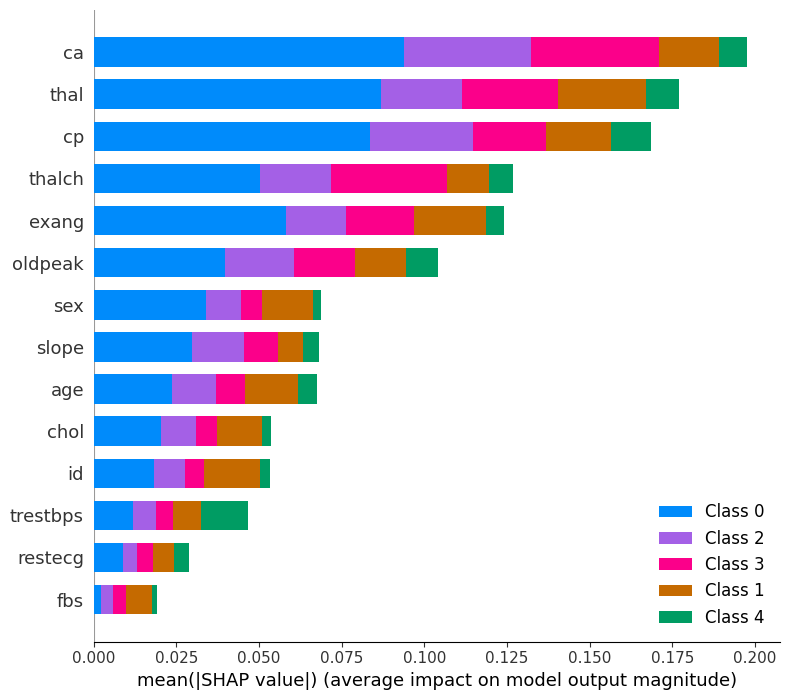

In [ ]:
explainer = shap.TreeExplainer(model)

shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names=X.columns)

In [ ]:
shap.initjs()

instance_index = 0
shap.force_plot(explainer.expected_value[1], shap_values[1][instance_index], X_test.iloc[instance_index])